In [1]:
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# mnist 데이터셋 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [6]:
pd.Series(y_train).unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

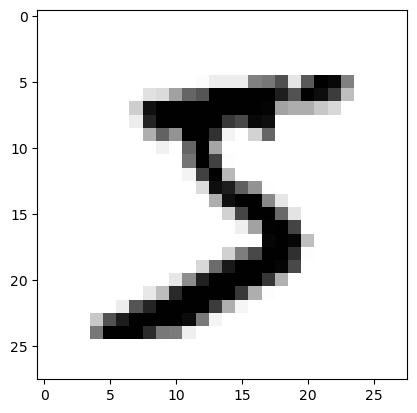

In [7]:
plt.imshow(x_train[0], cmap = "gray_r")
plt.show()

In [8]:
x_sub, x_val, y_sub, y_val = train_test_split(x_train, y_train, stratify = y_train, test_size = 0.25, random_state = 7)

In [9]:
scaled_sub = x_sub / 255
scaled_val = x_val / 255
scaled_test = x_test / 255

### 모델 구성

In [10]:
model = keras.Sequential([
    # 1차 합성곱신경망
    keras.layers.Conv2D(32, kernel_size = (3, 3), activation = "relu", padding = "same", input_shape = (28, 28, 1), name = "CNN01"),
    keras.layers.MaxPool2D(2, name = "Pool01"),
    
    # 2차 합성곱신경망
    keras.layers.Conv2D(64, kernel_size = (3, 3), activation = "relu", padding = "same", name = "CNN02"),
    keras.layers.MaxPool2D(2, name = "Pool02"),
    
    # Flatten, 은닉층, 드롭아웃, 출력층
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation = "relu", name = "Hidden"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation = "softmax")
], name = "CNN_MNIST_Model")

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
model.summary()

Model: "CNN_MNIST_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ CNN01 (Conv2D)                       │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool01 (MaxPooling2D)                │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CNN02 (Conv2D)                       │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool02 (MaxPooling2D)                │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden (Dense)                       │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-cnn-model.keras", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [13]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [14]:
history = model.fit(scaled_sub, y_sub, epochs = 50, validation_data = (scaled_val, y_val), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8462 - loss: 0.4863 - val_accuracy: 0.9789 - val_loss: 0.0687
Epoch 2/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9727 - loss: 0.0923 - val_accuracy: 0.9857 - val_loss: 0.0490
Epoch 3/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9807 - loss: 0.0624 - val_accuracy: 0.9865 - val_loss: 0.0451
Epoch 4/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9836 - loss: 0.0531 - val_accuracy: 0.9872 - val_loss: 0.0416
Epoch 5/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9872 - loss: 0.0404 - val_accuracy: 0.9880 - val_loss: 0.0429
Epoch 6/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9899 - loss: 0.0333 - val_accuracy: 0.9898 - val_loss: 0.0356
Epoch 7/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9907 - loss: 0.0291 - val_accuracy: 0.9886 - val_loss: 0.0413
Epoch 8/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9923 - loss: 0

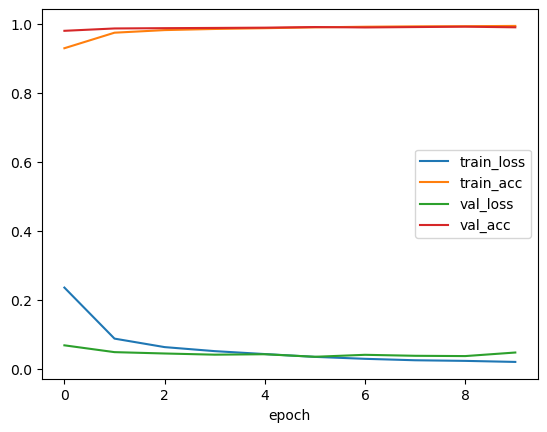

In [15]:
plt.figure()

plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["accuracy"], label = "acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend(("train_loss", "train_acc", "val_loss", "val_acc"))
plt.xlabel("epoch")
plt.show()

In [16]:
model.evaluate(scaled_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9867 - loss: 0.0368


[0.029811182990670204, 0.989799976348877]

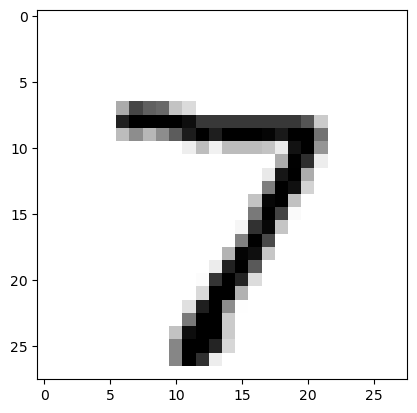

In [17]:
# 데이터 시각화
plt.imshow(scaled_test[0].reshape(28, 28), cmap = "gray_r")
plt.show()

In [18]:
preds = model.predict(scaled_test[[0]])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[5.6904161e-14 4.2505433e-10 1.1136960e-09 1.7485410e-09 3.0801112e-11
  1.7445043e-12 1.4084666e-17 9.9999988e-01 2.5066929e-11 6.4685658e-08]]


In [19]:
preds.argmax()

7

In [20]:
y_test[0]

7